In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
housing=pd.read_csv("housing.csv")

In [50]:
housing.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [51]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy='median')
impute.fit(housing)

SimpleImputer(strategy='median')

In [52]:
imp=impute.transform(housing)

In [53]:
housing_tr=pd.DataFrame(imp, columns=housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284168,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.701839,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887250,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [81]:
X=np.array(housing_tr['RM']).reshape(-1,1)
y=np.array(housing_tr['MEDV'])

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

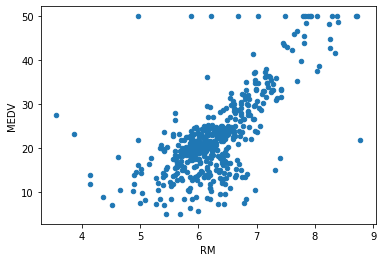

In [60]:
#from pandas.plotting import scatter_matrix
#attr=['MEDV', 'RM']
#scatter_matrix(housing[attr], figsize=(10,10))
housing_tr.plot(kind='scatter', x='RM', y='MEDV', alpha=1)

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0)

In [64]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(379, 1)
(127, 1)
(379,)
(127,)


In [90]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
#from sklearn.ensemble import RandomForestRegressor
model = AdaBoostRegressor(DecisionTreeRegressor(random_state=0))
#model = RandomForestRegressor()
model.fit(X_train, y_train)
predictions=model.predict(X_test)

In [91]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test, predictions)
rmse=np.sqrt(mse)

In [92]:
rmse

8.177915815573927

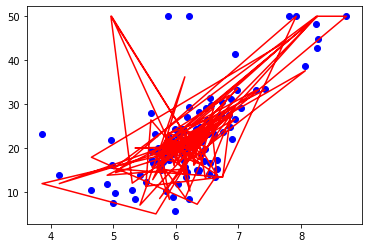

In [94]:
plt.scatter(X_test, y_test, c='b', label="training examples")
plt.plot(X_test, predictions, c='r', label='AdaBoostRegressor')
plt.show()